In [71]:
# Importing necessary libraries

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import ConfusionMatrixDisplay


seed = 1999
np.random.seed(seed)
tf.random.set_seed(seed)

In [72]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [73]:
# Preprocessing the data
# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

#train_labels = train_labels
#test_labels = test_labels

# Hot encoding
train_labels_h = to_categorical(train_labels)
test_labels_h = to_categorical(test_labels)

print(train_images.shape)
print(train_labels_h.shape)
print(test_images.shape)
print(test_labels_h.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


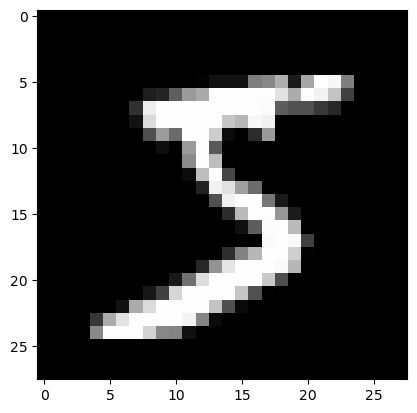

In [74]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap = 'gray')

print(train_labels[0])
print(train_labels_h[0])

In [75]:
train_lab = to_categorical(train_labels_h[0])
print(train_lab)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [76]:
# Function to build and compile the model
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate(optimizer_name, optimizer):
    # Reset TensorFlow session
    tf.keras.backend.clear_session()
    
    model = build_model(optimizer)
    model.fit(train_images, train_labels_h, validation_data=(test_images, test_labels_h), epochs=25, batch_size=32, verbose=0)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images, test_labels_h, verbose=0)
    test_predicted = model.predict(test_images, verbose=0)
    test_predicted_classes = np.argmax(test_predicted, axis=1)
    
    precision = precision_score(test_labels, test_predicted_classes, average='macro')
    recall = recall_score(test_labels, test_predicted_classes, average='macro')
    f1 = f1_score(test_labels, test_predicted_classes, average='macro')
    accuracy = accuracy_score(test_labels, test_predicted_classes)
    
    return {
        'Optimizer': optimizer_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1,
        'Predictions': test_predicted_classes  # To be used for confusion matrix plotting
    }

# Define optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.001)
}

# Evaluate all optimizers
results = []
predictions = {}
for name, opt in optimizers.items():
    result = train_and_evaluate(name, opt)
    results.append({
        'Optimizer': name,
        'Accuracy': result['Accuracy'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
        'F1_score': result['F1_score']
    })
    predictions[name] = result['Predictions']

results_df = pd.DataFrame(results)


C:\Users\aysha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\aysha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\aysha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
# Print model summary
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
print(results_df)

  Optimizer  Accuracy  Precision    Recall  F1_score
0      Adam    0.9787   0.978667  0.978515  0.978554
1       SGD    0.9236   0.922832  0.922436  0.922461
2   RMSprop    0.9765   0.976410  0.976260  0.976321
3   Adagrad    0.9289   0.928122  0.927938  0.927885


In [79]:
# Determine the best and worst optimizer based on accuracy
best_optimizer = results_df.loc[results_df['Accuracy'].idxmax()]
worst_optimizer = results_df.loc[results_df['Accuracy'].idxmin()]

# Print the best and worst optimizer details
print("\nBest Optimizer:")
print(best_optimizer)

print("\nWorst Optimizer:")
print(worst_optimizer)


Best Optimizer:
Optimizer        Adam
Accuracy       0.9787
Precision    0.978667
Recall       0.978515
F1_score     0.978554
Name: 0, dtype: object

Worst Optimizer:
Optimizer         SGD
Accuracy       0.9236
Precision    0.922832
Recall       0.922436
F1_score     0.922461
Name: 1, dtype: object


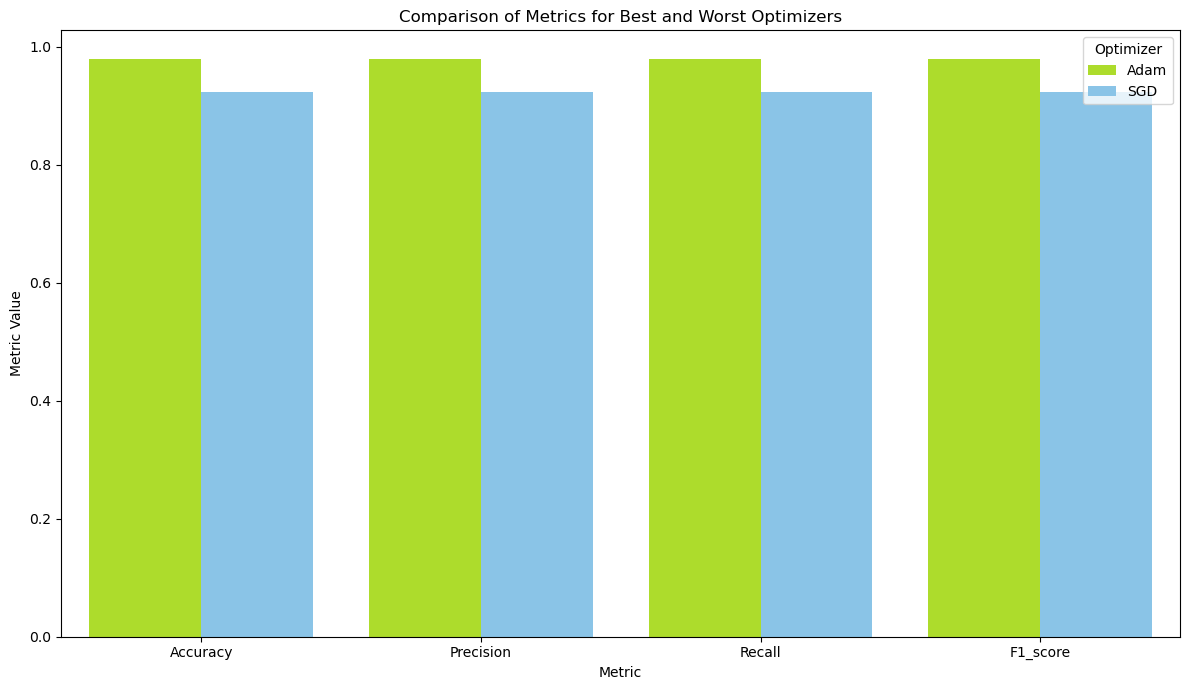

In [80]:
# Filter results to include only the best and worst optimizers
filtered_results_df = results_df[results_df['Optimizer'].isin([best_optimizer['Optimizer'], worst_optimizer['Optimizer']])]

# Prepare data for plotting
metrics_df = pd.melt(filtered_results_df, id_vars='Optimizer', var_name='metric', value_name='value')

# Define custom color palette
custom_palette = {
    best_optimizer['Optimizer']: '#BBF90F',  # Parrot Green
    worst_optimizer['Optimizer']: '#7BC8F6'  # Dusty Blue
}

# Plotting the results
plt.figure(figsize=(12, 7))
sns.barplot(x='metric', y='value', hue='Optimizer', data=metrics_df, palette=custom_palette)
plt.title('Comparison of Metrics for Best and Worst Optimizers')
plt.ylabel('Metric Value')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()


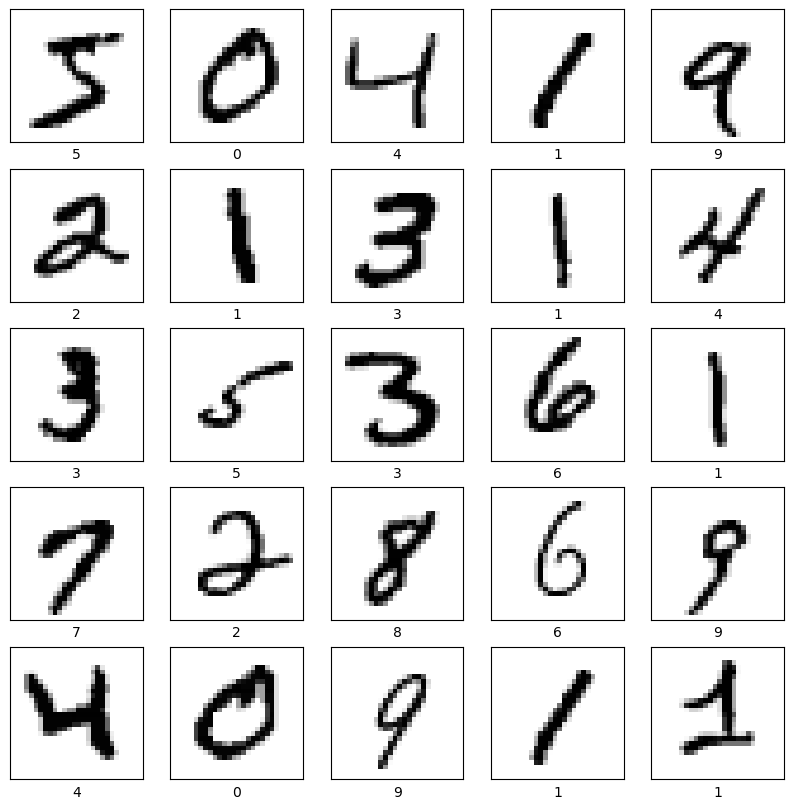

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


<Figure size 1000x800 with 0 Axes>

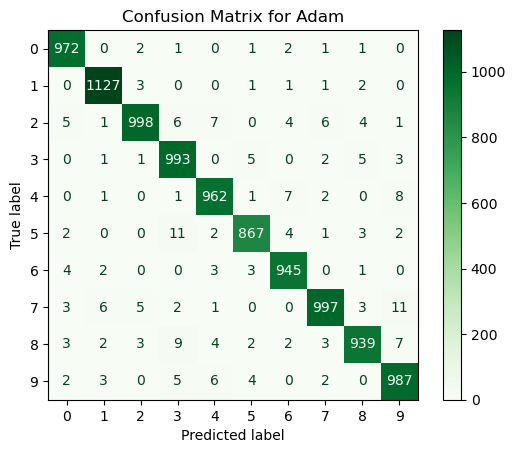

In [82]:
# Plot confusion matrix for the best optimizer
best_optimizer_preds = predictions[best_optimizer['Optimizer']]
cm_best = confusion_matrix(test_labels, best_optimizer_preds)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=np.arange(10))
plt.figure(figsize=(10, 8))
disp_best.plot(cmap='Greens')
plt.title(f'Confusion Matrix for {best_optimizer["Optimizer"]}')
plt.show()

<Figure size 1000x800 with 0 Axes>

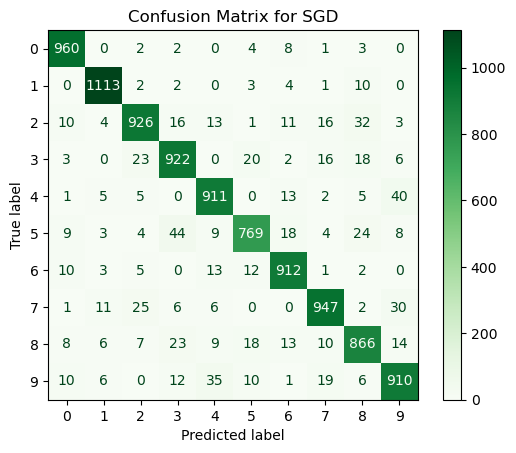

In [83]:
# Plot confusion matrix for the worst optimizer
worst_optimizer_preds = predictions[worst_optimizer['Optimizer']]
cm_worst = confusion_matrix(test_labels, worst_optimizer_preds)
disp_worst = ConfusionMatrixDisplay(confusion_matrix=cm_worst, display_labels=np.arange(10))
plt.figure(figsize=(10, 8))
disp_worst.plot(cmap='Greens')
plt.title(f'Confusion Matrix for {worst_optimizer["Optimizer"]}')
plt.show()

In [84]:
# Function to plot misclassifications
def plot_misclassifications(images, true_labels, predicted_labels, num_examples=10):
    misclassified_indices = np.where(true_labels != predicted_labels)[0]
    if len(misclassified_indices) == 0:
        print("No misclassifications found.")
        return
    
    # Randomly sample misclassified indices
    sample_indices = np.random.choice(misclassified_indices, num_examples, replace=False)
    
    plt.figure(figsize=(12, 12))
    for i, index in enumerate(sample_indices):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[index], cmap=plt.cm.binary)
        plt.xlabel(f'True: {true_labels[index]}, Pred: {predicted_labels[index]}')
    plt.tight_layout()
    plt.show()

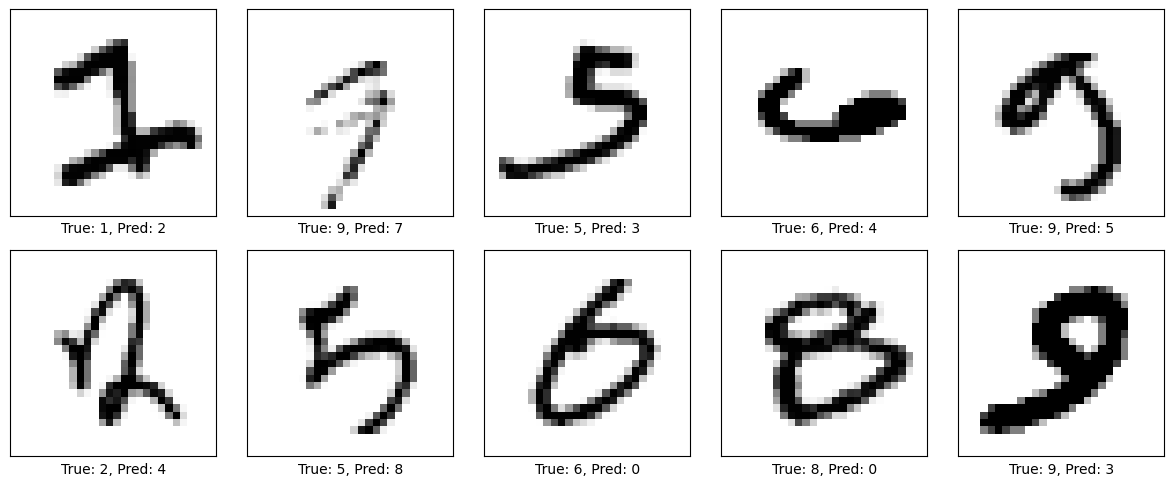

In [85]:
# Plot misclassifications for the best optimizer
plot_misclassifications(test_images, test_labels, best_optimizer_preds)

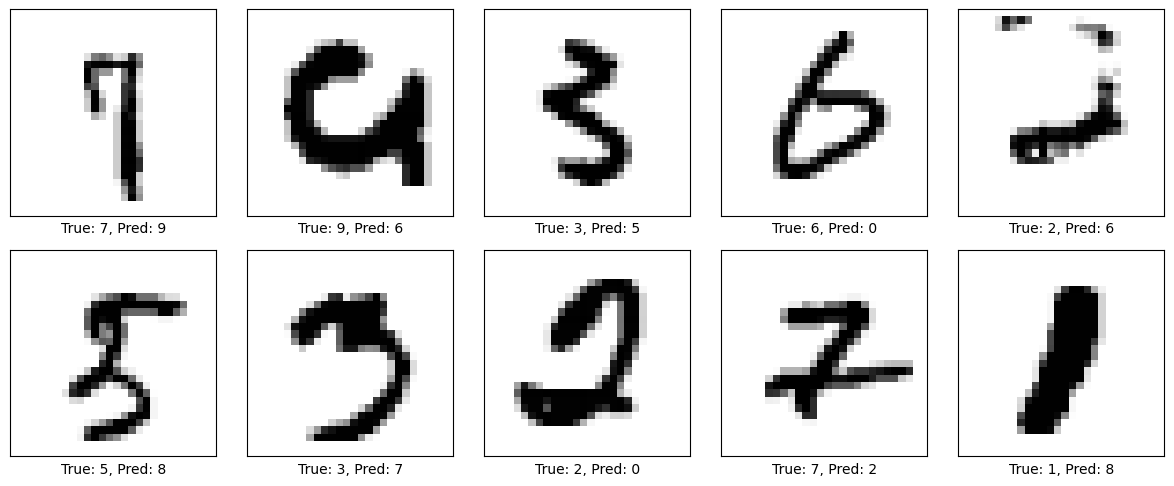

In [86]:
# Plot misclassifications for the worst optimizer
plot_misclassifications(test_images, test_labels, worst_optimizer_preds)